# Linear Regression Variants

```{note}
Linear Regression + L2 regularization = Ridge<br/>
Linear Regression + L1 regularization = Lasso<br/>
Linear Regression + PolynomialFeatures = Polynomial Regression
```

## Ridge

To lower variance $\Rightarrow $ limit model's complexity $\Rightarrow $ prevent the absolute value of parameters to be large $\Rightarrow $ we add punishment term concerning the absolute value of parameters on $J(\theta)$.

Ridge is linear regression plus the $l_{2}$ regularization term:

$$\underset{w}{\min}\left \|Xw - y  \right \|_{2}^{2} + \alpha\left \|w  \right \|_{2}^{2}$$

where $\alpha$ is the regularization hyperparameter.

In [1]:
import numpy as np

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
y = rng.randn(n_samples) 

In [2]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

## Lasso

Lasso(Least Absolute Shrinkage and Selection Operator) is linear regression plus the $l_{1}$ regularization term:

$$\underset{w}{\min}\frac{1}{2n_{samples}}\left \|Xw - y  \right \|_{2}^{2} + \alpha\left \|w  \right \|_{1}$$

Lasso can result in sparse parameters:

```{image} ../images/lasso.png
:alt: lasso
:width: 500px
:align: center
```

In [3]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])

array([0.8])

## Polynomial Regression

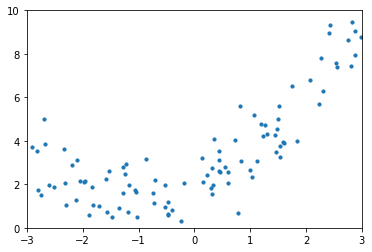

In [4]:
"""manual dataset"""
import matplotlib.pyplot as plt
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, s=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [5]:
"""
polynomial regression = PolynomialFeatures + LinearRegression
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

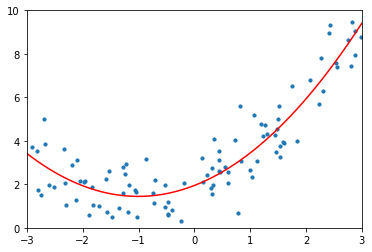

In [6]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, s=10)
plt.plot(X_new, y_new, c='r')
plt.axis([-3, 3, 0, 10])
plt.show()